In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [2]:
set.seed(42)

In [3]:
proj <- loadArchRProject("../data/snATAC", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
table(proj@cellColData$Sample)


CK166 CK167 CK168 CK169 CK170 CK171 CK173 CK337 CK338 CK339 CK340 CK346 CK351 
  662   464   328   224   419   582   333   103   104   169   319   106   213 
CK353 CK354 CK380 CK381 CK382 CK383 CK385 CK386 CK387 CK388 CK389 CK390 
  132   193   227   148   451   202   141   107   235   370   153   149 

In [5]:
df_sample_annotation <- read.csv("../../../snATAC/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK166,control,P1,control_P1,group_1
2,CK170,FZ/GT,P4,FZ/GT_P4,group_3
3,CK174,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK171,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK169,IZ,P3,IZ_P3,group_2
6,CK168,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
proj@cellColData$region <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_region)
proj@cellColData$patient <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient)
proj@cellColData$patient_region_id <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_region)
proj@cellColData$patient_group <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_group)

In [7]:
proj <- addIterativeLSI(
    ArchRProj = proj,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-2bfabe66f5a30d-Date-2021-11-13_Time-15-37-47.log
If there is an issue, please report to github with logFile!

2021-11-13 15:37:48 : Computing Total Across All Features, 0.015 mins elapsed.

2021-11-13 15:37:54 : Computing Top Features, 0.11 mins elapsed.

###########
2021-11-13 15:37:55 : Running LSI (1 of 3) on Top Features, 0.127 mins elapsed.
###########

2021-11-13 15:37:55 : Creating Partial Matrix, 0.127 mins elapsed.

2021-11-13 15:38:21 : Computing LSI, 0.575 mins elapsed.

2021-11-13 15:38:37 : Identifying Clusters, 0.837 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
2021-11-13 15:38:49 : Identified 4 Clusters, 1.026 mins elapsed.

2021-11-13 15:38:49 : Saving LSI Iteration, 1.026 mins elapsed.

Length of unique values greater than palette, interpolating..

2021-11-13 15:39:08 : Creating Cluster Matrix on the total Group Features, 1.35 mins elapsed.

2021-11-13 15:40:15 :

In [8]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

15:43:19 Creating temp model dir /tmp/RtmpV1B4Cx/dir2bfabe53de20f

15:43:19 Creating dir /tmp/RtmpV1B4Cx/dir2bfabe53de20f

15:43:20 Changing to /tmp/RtmpV1B4Cx/dir2bfabe53de20f

15:43:20 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Fibroblast/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-2bfabe575bce18-Date-2021-11-13_Time-15-43-19.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe1d6d93c3-Date-2021-11-13_Time-15-43-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe1d6d93c3-Date-2021-11-13_Time-15-43-20.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe261ccee1-Date-2021-11-13_Time-15-43-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe261ccee1-Date-2021-11-13_Time-15-43-20.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe2020c231-Date-2021-11-13_Time-15-43-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe2020c231-Date-2021-11

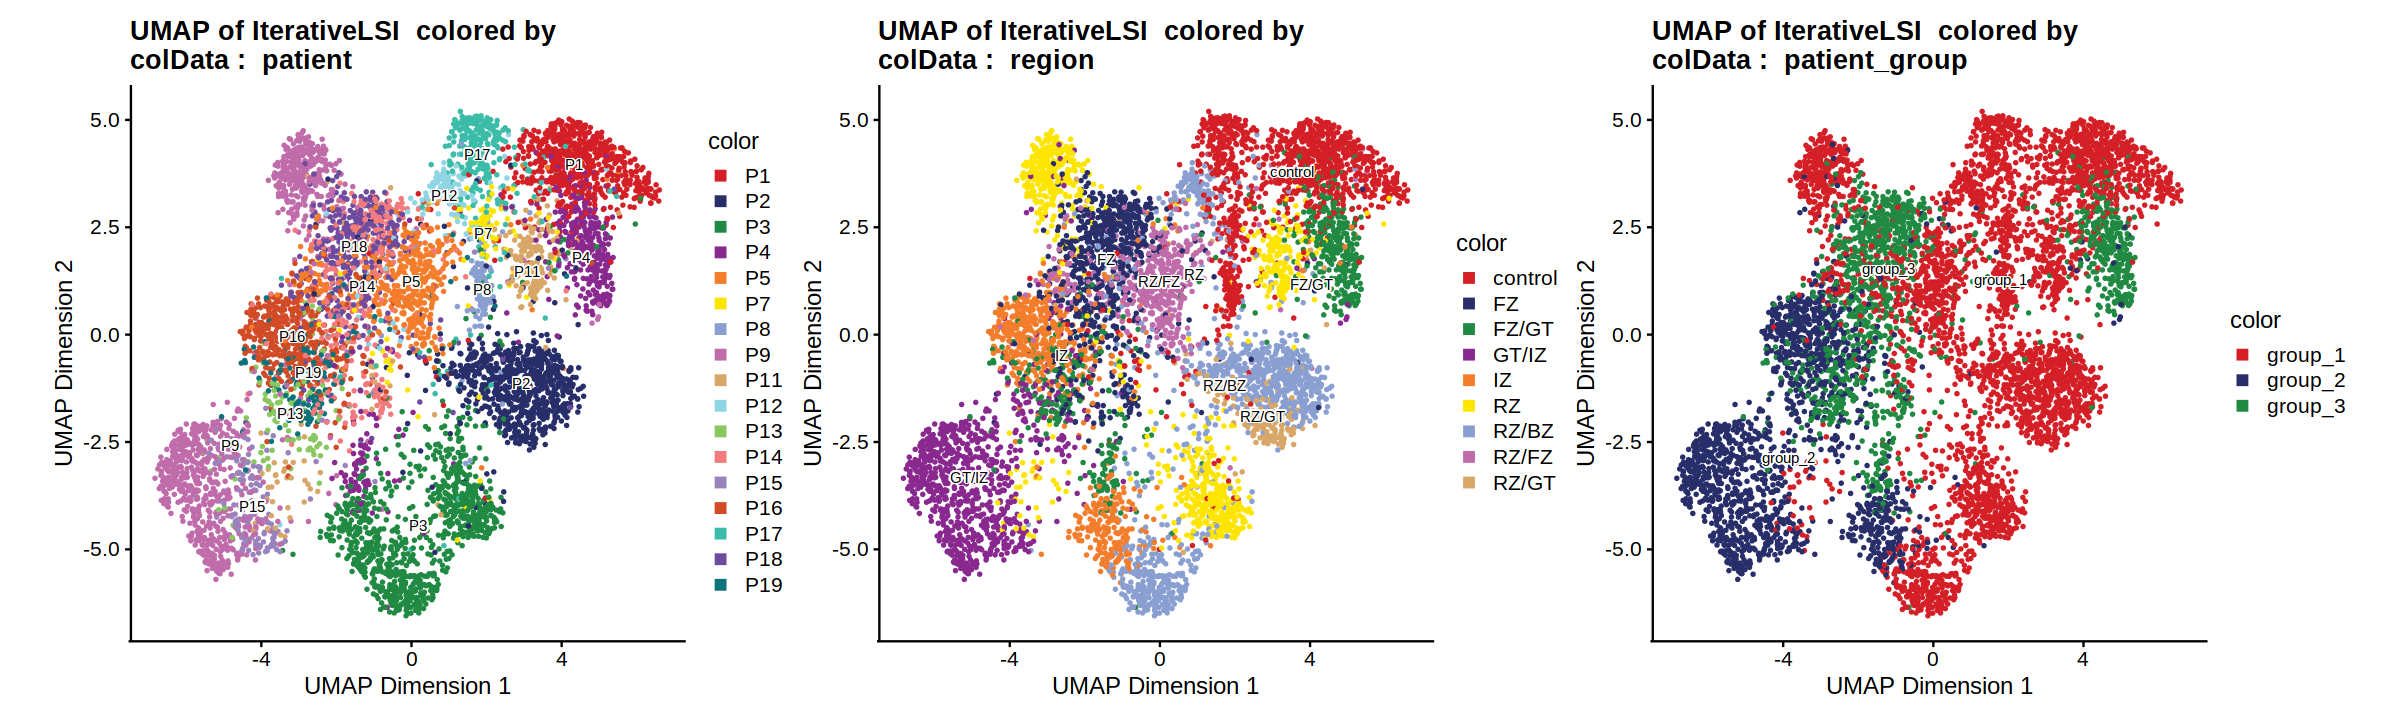

In [9]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [10]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = c("patient", "Sample"),
    force = TRUE
)

proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony", 
    name = "UMAP_Harmony", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

15:43:43 Creating temp model dir /tmp/RtmpV1B4Cx/dir2bfabe7b715582

15:43:43 Creating dir /tmp/RtmpV1B4Cx/dir2bfabe7b715582

15:43:43 Changing to /tmp/RtmpV1B4Cx/dir2bfabe7b715582

15:43:43 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Fibroblast/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-Harmony-2bfabe4b432f77-Date-2021-11-13_Time-15-43-43.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe2410b7d2-Date-2021-11-13_Time-15-43-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe2410b7d2-Date-2021-11-13_Time-15-43-43.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe377d2c9-Date-2021-11-13_Time-15-43-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe377d2c9-Date-2021-11-13_Time-15-43-44.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe51e5e85-Date-2021-11-13_Time-15-43-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe51e5e85-Date-2021-11-13_

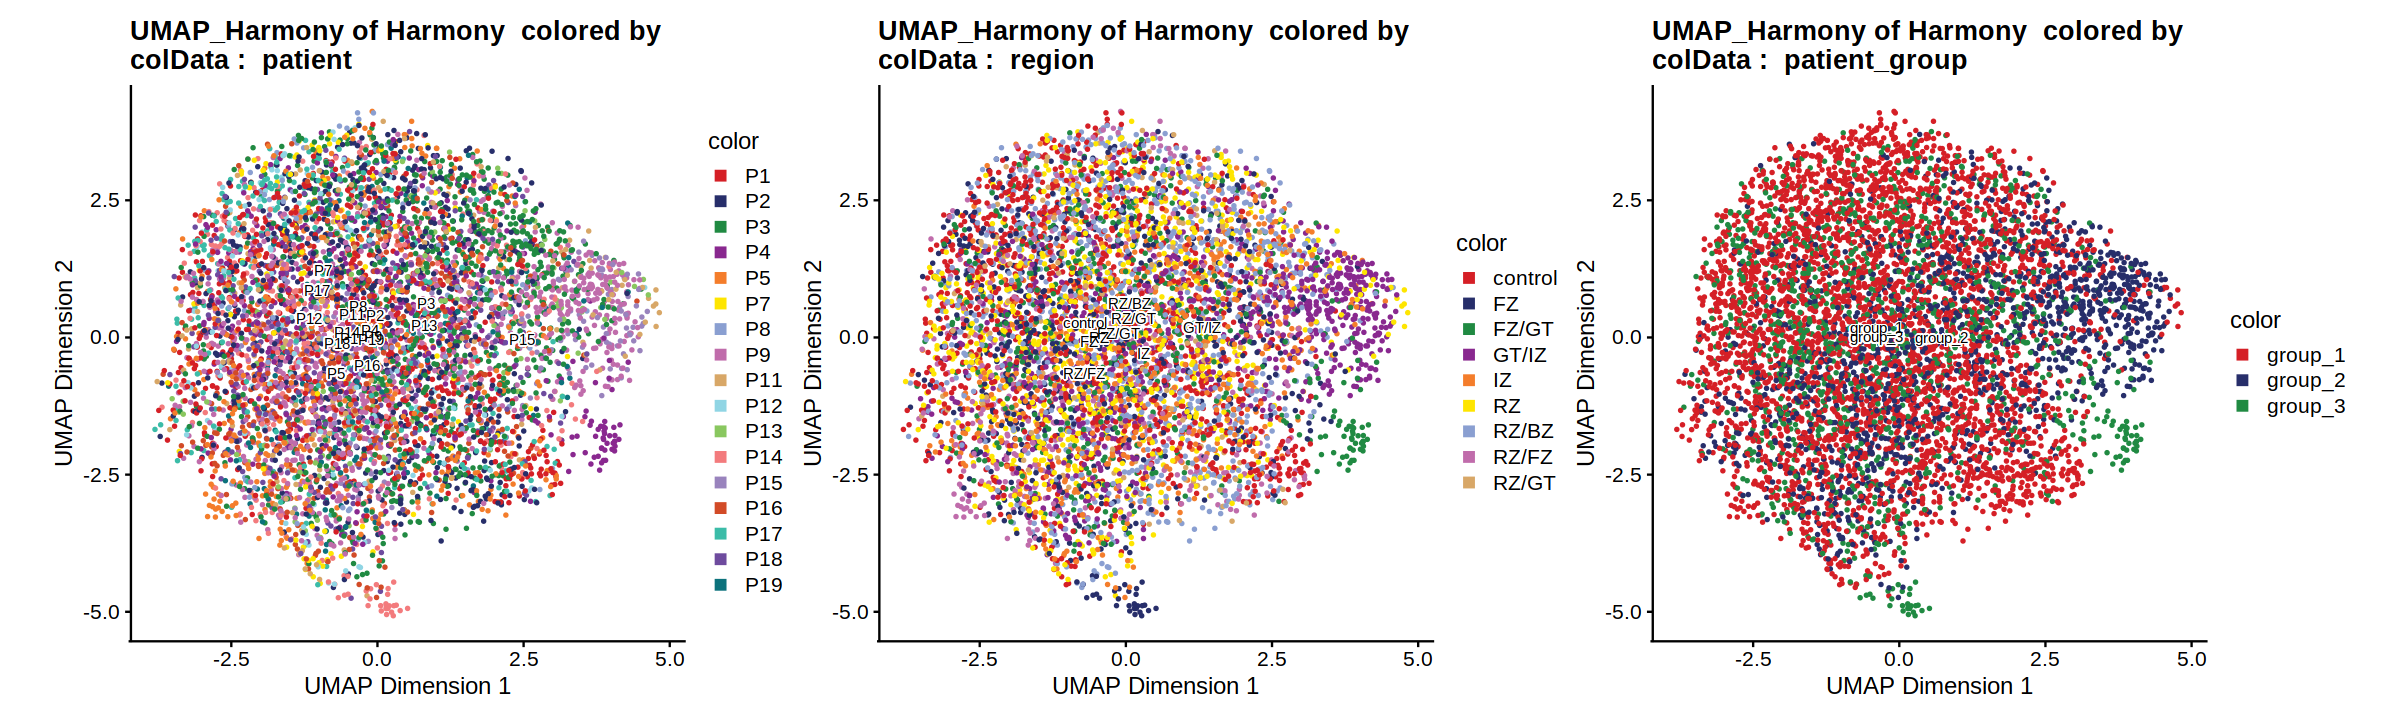

In [11]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [12]:
proj <- addImputeWeights(proj, reducedDims = "Harmony")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-2bfabe5a461f19-Date-2021-11-13_Time-15-43-46.log
If there is an issue, please report to github with logFile!

2021-11-13 15:43:47 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe46a8f312-Date-2021-11-13_Time-15-44-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-13 15:44:05 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 


Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe46a8f312-Date-2021-11-13_Time-15-44-05.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe3368fc4e-Date-2021-11-13_Time-15-44-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-13 15:44:08 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 


Imputing Matrix

Using weights on 

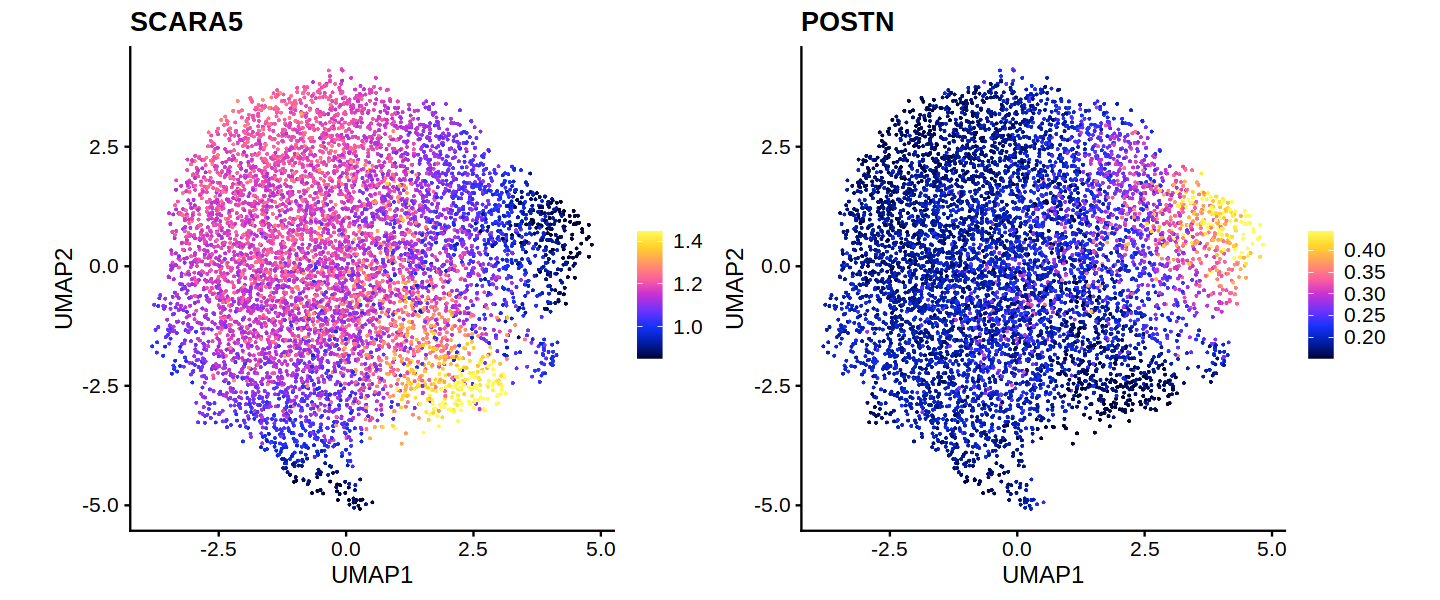

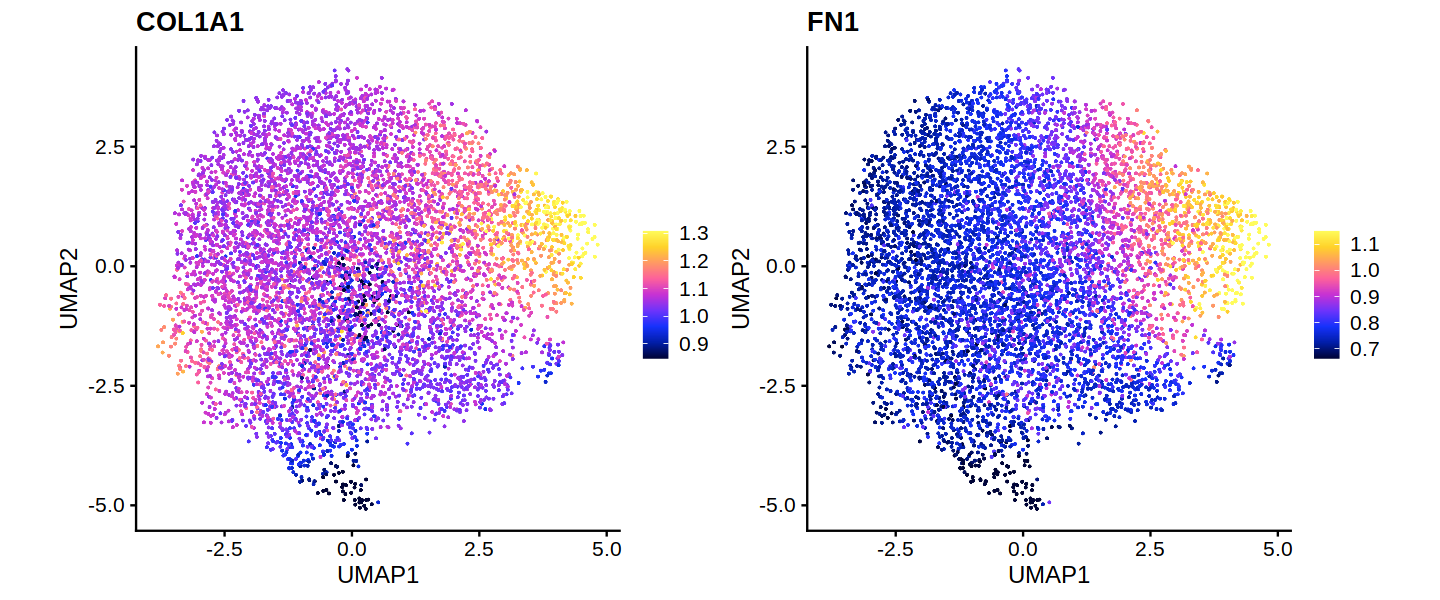

In [13]:
p1 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "SCARA5",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
    xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("SCARA5") +
    theme(legend.title = element_blank())

p2 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "POSTN",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("POSTN") +
        theme(legend.title = element_blank())

p3 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "COL1A1",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("COL1A1") +
        theme(legend.title = element_blank())

p4 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "FN1",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("FN1") +
        theme(legend.title = element_blank())

options(repr.plot.height = 5, repr.plot.width = 12)

ggAlignPlots(p1, p2, type = "h")
ggAlignPlots(p3, p4, type = "h")

ArchR logging to : ArchRLogs/ArchR-addClusters-2bfabe7e3880b1-Date-2021-11-13_Time-15-48-41.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2021-11-13 15:48:41 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6534
Number of edges: 247784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7383
Number of communities: 5
Elapsed time: 0 seconds


2021-11-13 15:48:51 : Testing Biased Clusters, 0.165 mins elapsed.

2021-11-13 15:48:51 : Testing Outlier Clusters, 0.166 mins elapsed.

2021-11-13 15:48:51 : Assigning Cluster Names to 5 Clusters, 0.166 mins elapsed.

2021-11-13 15:48:51 : Finished addClusters, 0.167 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2bfabe34665223-Date-2021-11-13_Time-15-48-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2bfabe34665223-Date-2021-11-13_Time-15-48-51.log



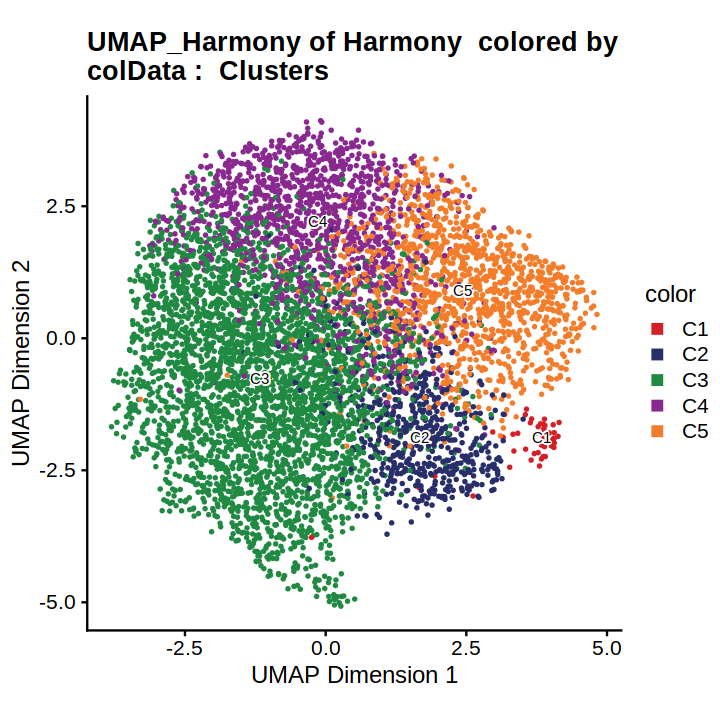

In [22]:
## clustering
proj <- addClusters(
    input = proj,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.4,
    force = TRUE
)

p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "Clusters", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.height = 6, repr.plot.width = 6)

p1

In [23]:
table(proj@cellColData$Clusters)


  C1   C2   C3   C4   C5 
  49  558 3340 1354 1233 

In [24]:
cM <- confusionMatrix(paste0(proj$Clusters), paste0(proj$Sample))
cM

   [[ suppressing 25 column names ‘CK171’, ‘CK167’, ‘CK380’ ... ]]



5 x 25 sparse Matrix of class "dgCMatrix"
                                                                             
C4 173  93  60  62  47 158  25  55  83 112 48 52 42 63 32 44  26 31  20 12  5
C3 258 280 112  86 143 349 259 232 279 131 56 71 47 65 79 39  77 93  72 49 77
C5  72  29  50 149  37  38  14  56  51  50  9  2  6  2 32 11 111 26 110 88 21
C2  79  62   5  30   8 117  21  27  38  40 19 16  8 18 26 10  10  3   .  .  3
C1   .   .   .   1   .   .   .   .   .   .  .  .  .  .  .  .   .  .   .  .  .
                
C4 18 10  70  13
C3 52 93 241 100
C5 37 87  48  97
C2  .  3  12   3
C1  .  .  48   .

In [14]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

Saving ArchRProject...



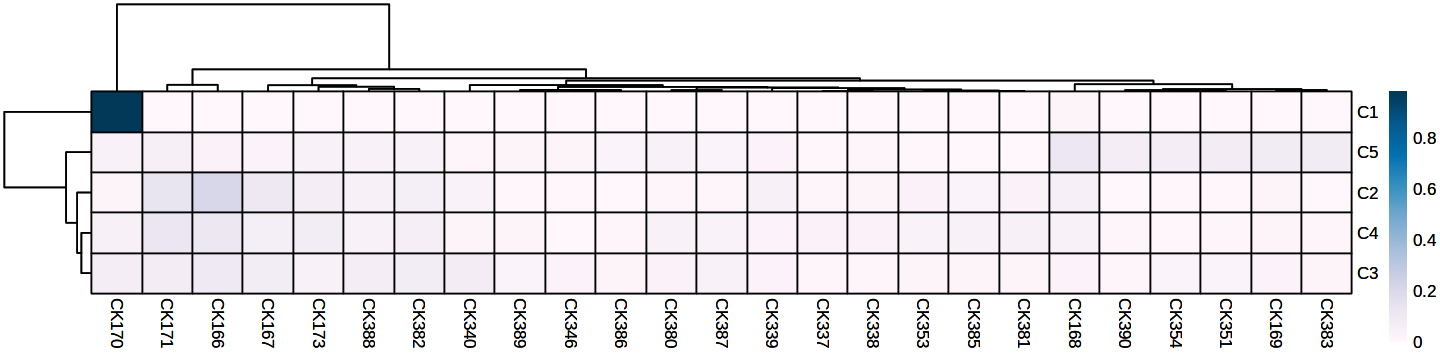

In [30]:
options(repr.plot.width = 12, repr.plot.height = 3)

library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

In [34]:
meta.data <- as.data.frame(proj@cellColData)
head(meta.data)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,⋯,BlacklistRatio,DoubletScore,DoubletEnrichment,ReadsInPeaks,FRIP,Clusters,region,patient,patient_region_id,patient_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
CK171#CGGACCAGTGAGTTGG-1,CK171,8.143,14192,16121,569,0.12540646,1,0.3030125,2203,49328,⋯,0.004426293,0.000000,0.36,51477,0.4009175,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#AAAGGGCAGGTAGGAA-1,CK171,7.651,16340,19824,515,0.15509310,1,0.6512079,6173,38705,⋯,0.004029103,0.000000,0.88,61851,0.4845055,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#TCTAGTTTCCACCTAC-1,CK171,9.404,15339,17034,600,0.14755973,1,0.6799779,5878,34357,⋯,0.005197595,89.581130,5.28,55486,0.4814654,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#GTAGTACAGGCCTAAG-1,CK171,7.601,11273,13899,442,0.14881475,1,0.6014197,5138,29161,⋯,0.004732435,1.636976,1.72,41855,0.4486355,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#GGGTCTGTCGGGTCCA-1,CK171,5.805,4151,5543,678,0.06423539,1,0.3171938,2011,32756,⋯,0.007857044,0.000000,0.60,18755,0.2181169,C3,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#TTCGATTGTGCAACAG-1,CK171,5.695,6091,7986,530,0.09531198,1,0.4953064,3363,28017,⋯,0.006325488,28.944902,3.20,27099,0.3237944,C3,RZ/BZ,P2,RZ/BZ_P2,group_1


In [36]:
cols <- ArchR::paletteDiscrete(meta.data$Clusters)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



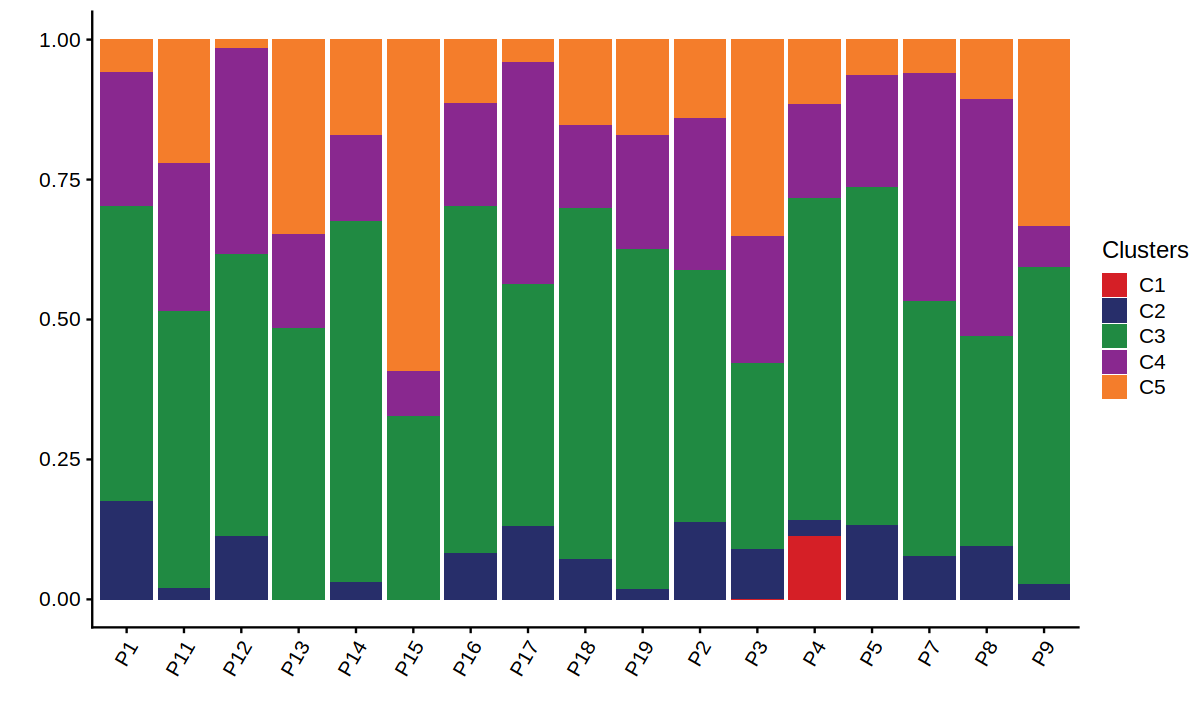

In [38]:
df_plot <- meta.data %>%
    group_by(patient, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



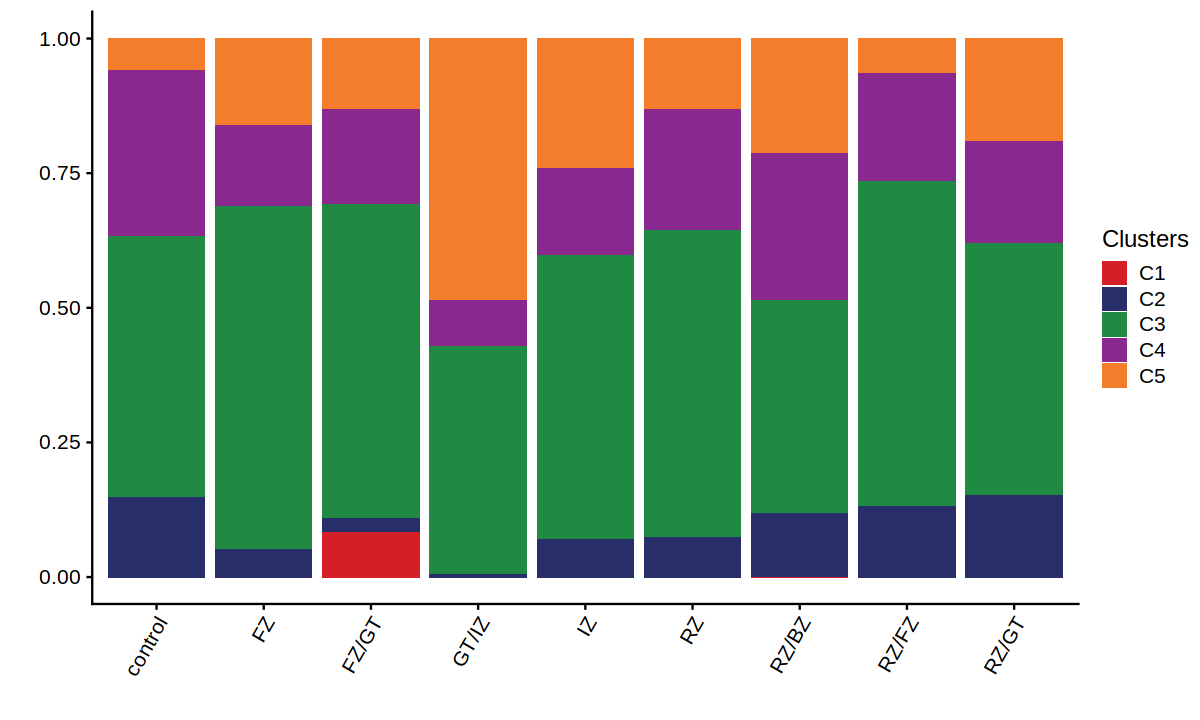

In [42]:
df_plot <- meta.data %>%
    group_by(region, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.



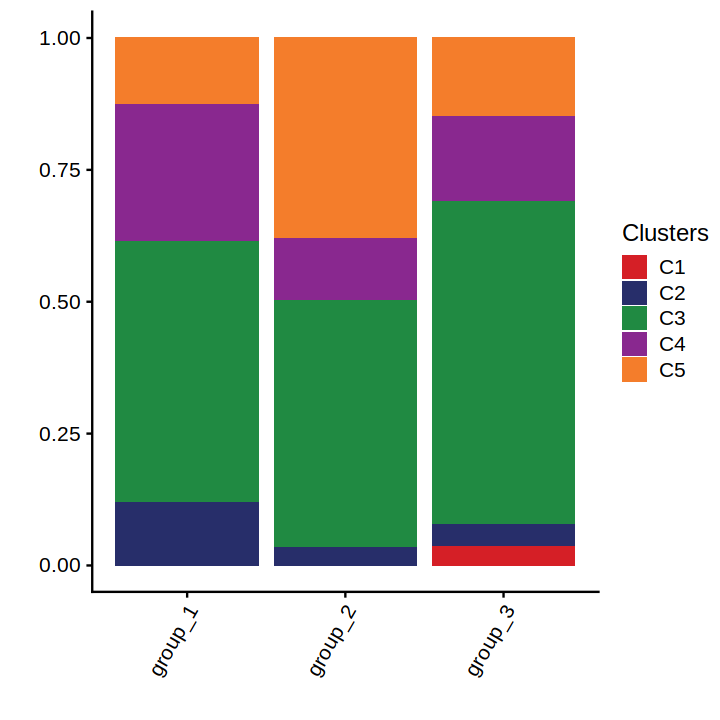

In [41]:
df_plot <- meta.data %>%
    group_by(patient_group, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 6, repr.plot.height = 6)

p1

In [15]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.0.3/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                gridExtra_2.3              
 [3] uwot_0.1.10                 cowplot_1.1.1              
 [5] dplyr_1.0.7                 harmony_1.0                
 [7] Rcpp_1.0.7                  Signac_1.4.0               
 [9] SeuratObject_4.0.2  